In [100]:
from PIL import Image
import pandas as pd
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import torchvision.transforms.functional as F
import numpy as np
import face_recognition
from itertools import combinations
import seaborn as sns


In [20]:
sample_df = pd.read_csv('../data/celeb_dataset/samples.csv')

In [21]:
root_folder = r'../data/celeb_dataset/img_align_celeba/img_align_celeba/'

In [22]:
print(root_folder + sample_df.iloc[0]['image_id'])

../data/celeb_dataset/img_align_celeba/img_align_celeba/066574.jpg


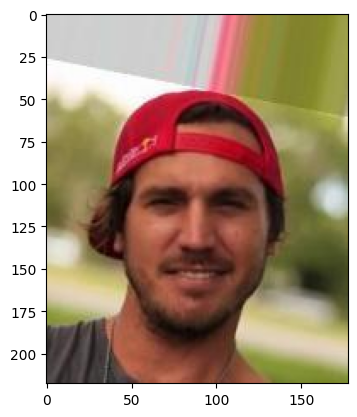

In [24]:
img_name = sample_df.iloc[0]['image_id']
img = Image.open(root_folder + img_name)
img_np = np.asarray(img)
plt.imshow(img)

<class 'numpy.ndarray'>


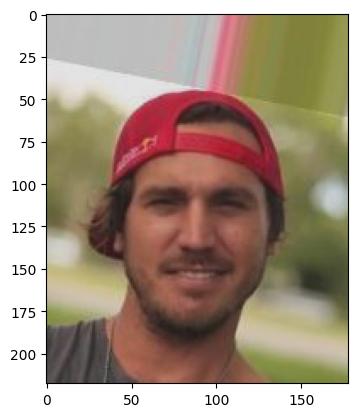

In [25]:
brightness_factor = 1.5
img_adjusted = F.adjust_brightness(img, 5)
img_adjusted = F.adjust_contrast(img, 0.8)
img_adjusted = np.asarray(img_adjusted)
print(type(img_adjusted))

# Display the brightness-adjusted image
plt.imshow(np.asarray(img_adjusted))


# Making prediction with increased brightness

In [26]:
brigthness_preds = []
for i in tqdm(range(len(sample_df))):
    img_name = sample_df.iloc[i]['image_id']
    img = Image.open(root_folder + img_name)
    img_adjusted = F.adjust_brightness(img, 1.5)
    br_img = np.asarray(img_adjusted)
    locs = face_recognition.face_locations(br_img)
    if len(locs) == 0:
        brigthness_preds.append(0)
    else:
        brigthness_preds.append(1)
    

In [27]:
new_sample_df = pd.read_csv('../data/preds_on_all_augmentations.csv')

In [34]:
new_sample_df['Recognized_brighter'].value_counts()

 1    40288
-1     5321
Name: Recognized_brighter, dtype: int64

# Making predictions with more contrast

In [30]:
contrast_preds = []
for i in tqdm(range(len(sample_df))):
    img_name = sample_df.iloc[i]['image_id']
    img = Image.open(root_folder + img_name)
    img_adjusted = F.adjust_contrast(img, 1.2)
    br_img = np.asarray(img_adjusted)
    locs = face_recognition.face_locations(br_img)
    if len(locs) == 0:
        contrast_preds.append(-1)
    else:
        contrast_preds.append(1)

In [39]:
pred_combs = list(combinations(new_sample_df.columns[-5:],2))
pred_combs

[('Recognized', 'Recognized_lighter_skin'),
 ('Recognized', 'Recognized_darker_skin'),
 ('Recognized', 'Recognized_brighter'),
 ('Recognized', 'Recognized_contrast'),
 ('Recognized_lighter_skin', 'Recognized_darker_skin'),
 ('Recognized_lighter_skin', 'Recognized_brighter'),
 ('Recognized_lighter_skin', 'Recognized_contrast'),
 ('Recognized_darker_skin', 'Recognized_brighter'),
 ('Recognized_darker_skin', 'Recognized_contrast'),
 ('Recognized_brighter', 'Recognized_contrast')]

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
error
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young
Recognized
error
Recognized_lighter_skin
error
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


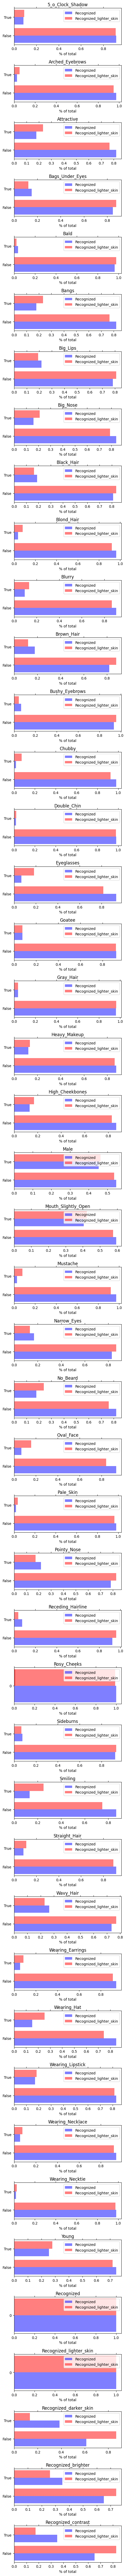

In [46]:
col1,col2 = pred_combs[0]
col1,col2 = str(col1), str(col2)
df1 = new_sample_df.query(f'{col1} == -1 and {col2} == 1').set_index('image_id')
df2 = new_sample_df.query(f'{col1} == 1 and {col2} == -1').set_index('image_id')

bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(df1.columns), figsize=(5, 100))

for i, col in enumerate(df1.columns):
    # Calculate the position for the bars
    print(col)
    positions = np.arange(len(df1[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, df1[col].value_counts()/len(df1), height=bar_width, color='blue',
                alpha=0.5, label=col1)

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset,df2[col].value_counts()/len(df2), height=bar_width, color='red',
                alpha=0.5, label=col2)

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(df1[col].value_counts().index)
    try:
        axs[i].set_yticklabels(['False', 'True'])
    except:
        print('error')
    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()